In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [38]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv('salary_data_(cleaned).csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,Company_age (years),python,R,aws,spark,excel,Average_Revenue (million $),Average_company_size
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,NM,0,49,1,0,0,0,1,75.0,750
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other,...,MD,0,38,1,0,0,0,0,3500.0,10000
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,...,FL,1,12,1,0,0,1,1,300.0,750
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Other,...,WA,1,57,1,0,0,0,0,750.0,3000
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Private,...,NY,1,24,1,0,0,0,1,1.0,125


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Average_Salary (K$)', 'job_state', 'same_state', 'Company_age (years)',
       'python', 'R', 'aws', 'spark', 'excel', 'Average_Revenue (million $)',
       'Average_company_size'],
      dtype='object')

In [5]:
def job_title_simplifier(job_title):
    if 'data scientist' in job_title.lower():
        return 'Data Scientist'
    elif 'data engineer' in job_title.lower():
        return 'Data Engineer'
    elif 'analyst' in job_title.lower():
        return 'Analyst'
    elif 'machine learning' in job_title.lower():
        return 'Machine Learning'
    elif 'manager' in job_title.lower():
        return 'Manager'
    elif 'director' in job_title.lower():
        return 'Director'
    else:
        return 'Other'

In [6]:
def seniority(job_title):
    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'lead' in job_title.lower() or 'principal' in job_title.lower():
        return 'Senior'
    elif 'jr' in job_title.lower() or 'jr.' in job_title.lower():
        return 'Junior'
    else:
        return 'NA'

In [7]:
df['Job_title'] = df['Job Title'].apply(job_title_simplifier)

In [8]:
df['Job_title'].value_counts()

Data Scientist      279
Other               184
Data Engineer       119
Analyst             102
Manager              22
Machine Learning     22
Director             14
Name: Job_title, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df['seniority'].value_counts()

NA        520
Senior    220
Junior      2
Name: seniority, dtype: int64

In [11]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')

In [12]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
KY      6
DE      6
GA      6
MI      6
IA      5
CT      5
LA      4
NE      4
OR      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
df['No. of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['dec_len'] = df['Job Description'].apply(lambda x: len(x))

In [15]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [16]:
avg = round(np.average(df['Rating']), 1)
df['Rating'] = df['Rating'].apply(lambda x: avg if x == -1 else x)

In [17]:
df.describe()

,Rating,Founded,Average_Salary (K$),same_state,Company_age (years),python,R,aws,spark,excel,Average_Revenue (million $),Average_company_size,No. of Competitors,dec_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.687062,1837.154987,101.434636,0.557951,48.456873,0.528302,0.002695,0.237197,0.225067,0.522911,2270.788410,3360.047170,1.053908,3869.545822
std,0.566205,497.183763,37.546122,0.496965,53.900445,0.499535,0.051882,0.425651,0.417908,0.499812,3727.559113,3741.993606,1.384239,1521.495868
min,1.900000,-1.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,25.000000,0.000000,407.000000
25%,3.300000,1939.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,350.000000,0.000000,2801.000000
50%,3.700000,1988.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,300.000000,750.000000,0.000000,3731.000000
75%,4.000000,2007.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,7500.000000,3.000000,4740.000000
max,5.000000,2019.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10000.000000,4.000000,10051.000000


In [18]:
df.dtypes

Job Title                       object
Salary Estimate                 object
Job Description                 object
Rating                         float64
Company Name                    object
Location                        object
Headquarters                    object
Size                            object
Founded                          int64
Type of ownership               object
Industry                        object
Sector                          object
Revenue                         object
Competitors                     object
Average_Salary (K$)            float64
job_state                       object
same_state                       int64
Company_age (years)              int64
python                           int64
R                                int64
aws                              int64
spark                            int64
excel                            int64
Average_Revenue (million $)    float64
Average_company_size             int64
Job_title                

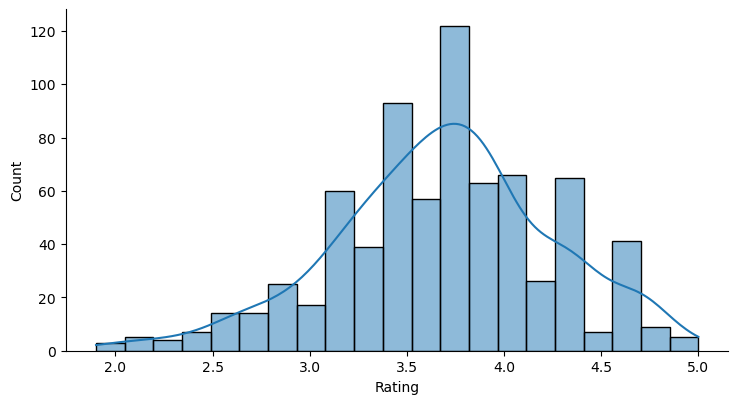

In [19]:
sns.displot(df.Rating, kde = True)
plt.gcf().set_size_inches(8,4)

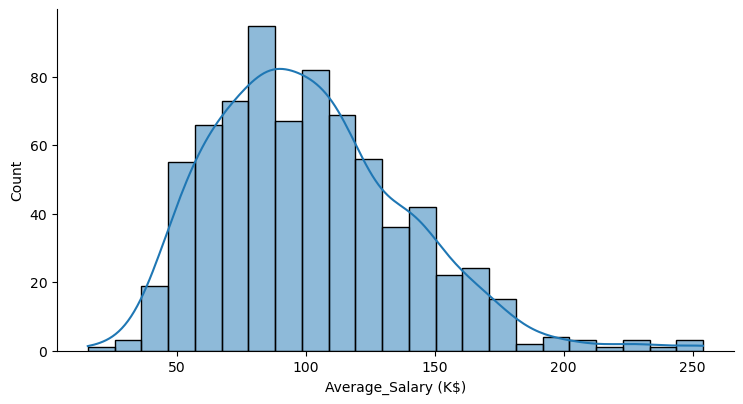

In [20]:
sns.displot(df['Average_Salary (K$)'], kde = True)
plt.gcf().set_size_inches(8,4)

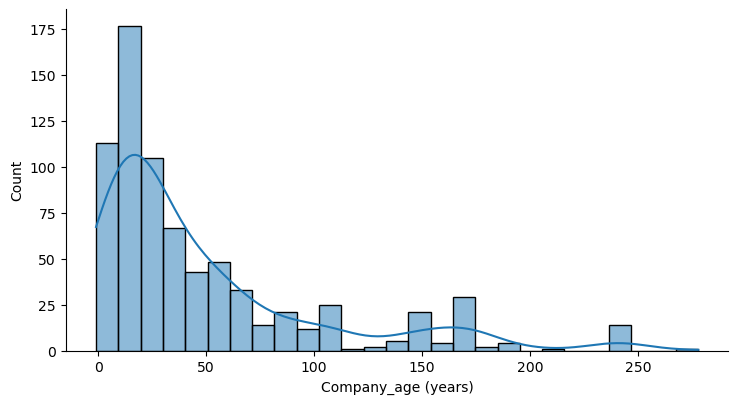

In [21]:
sns.displot(df['Company_age (years)'], kde = True)
plt.gcf().set_size_inches(8,4)

<AxesSubplot:>

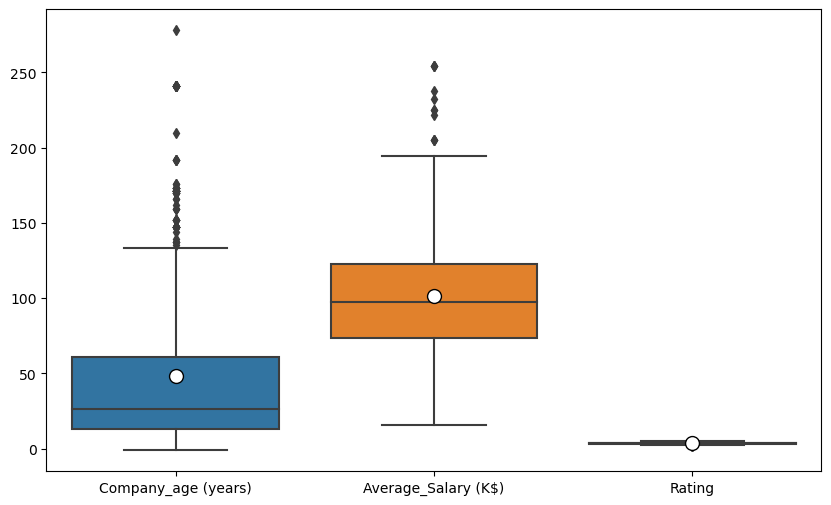

In [44]:
sns.boxplot(data = df[['Company_age (years)','Average_Salary (K$)','Rating']],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

<AxesSubplot:>

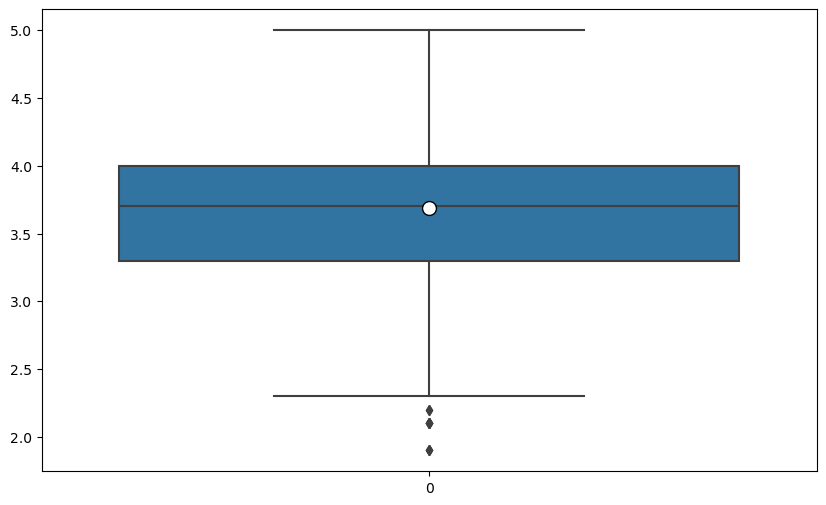

In [43]:
sns.boxplot(data = df['Rating'],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})